In [14]:
import tensorflow as tf
from tensorflow.core.util import event_pb2
import matplotlib.pyplot as plt
import sys, os, string
import numpy
from matplotlib.pyplot import figure
import collections
import seaborn

In [15]:

def my_mean(li):
    min_index = numpy.min([len(l) for l in li])
    _li = [l[0:min_index] for l in li]
    return numpy.mean(_li,axis=0), numpy.std(_li,axis=0), len(li)

def smooth(y, win = 5):
    if len(y) > win:
        yhat = [numpy.mean(y[max([0,x-win]):min([x+win,200])]) for x in range(len(y))]
        return numpy.array(yhat)
    return numpy.array(y)

def var(y, win = 10):
    if len(y) > win:
        yhat = [numpy.std(y[max([0,x-win]):min([x+win,200])]) for x in range(win,len(y)-win)]
        return yhat
    return y

def delta(y):
    ll=10
    yhat = [numpy.max(y[x:x+ll])-numpy.min(y[x:x+ll]) for x in range(len(y)-ll)]
    return yhat


In [16]:
# load tensorboard file and return a sequence of rewards
def load_rewards(result_path):
    # init list
    reward_list = []

    # load data
    prev_step = -1
    data = tf.data.TFRecordDataset(result_path)
    for i, serialized_example in enumerate(data):
        event = event_pb2.Event.FromString(serialized_example.numpy())
        for value in event.summary.value:
            if value.tag == "Eval/AverageReturns":
            #if value.tag == "Train/Loss":
                assert prev_step + 1 == event.step
                prev_step = event.step
                reward_list.append(value.simple_value)

    return reward_list

In [35]:
#path = 'results/July21_2022'
#path = 'results/August8_2022'
li_path = ['results/July21_2022', 'results/August8_2022']
li_path = ['results/August15_2022']
dic_all = {}
for path in li_path:
    li = os.listdir(path)
    #print(li)
    for l in li:
        if '.DS_Store' in l:
            continue
        game = l.split("_")[1]
        if game not in dic_all.keys():
            dic_all[game] = {}
        else:
            pass
        alg = l.split("_")[2:-1]
        alg = "-".join(alg)
        temp = path + '/' + l
        try:
            temp = temp + '/' + os.listdir(temp)[0]
            temp = load_rewards(temp)
            if alg not in dic_all[game].keys():
                dic_all[game][alg] = [temp]
            else:
                dic_all[game][alg].append(temp)
        except:
            print("problem with {}".format(temp))

200
200
200


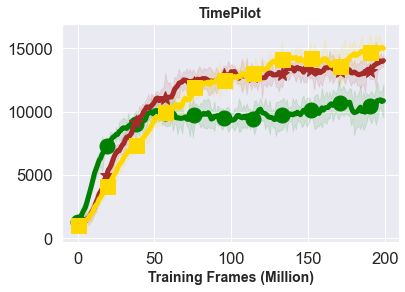

200
200
200


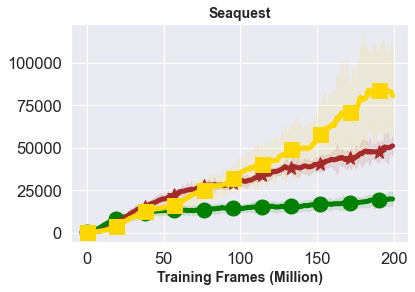

195
199
200


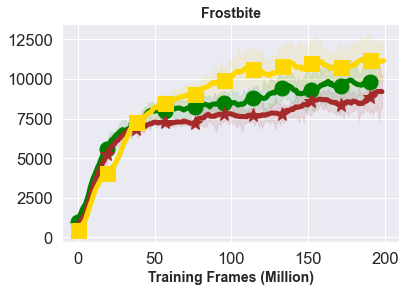

200
200
200


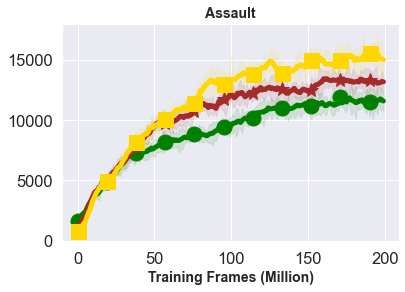

200
200
200


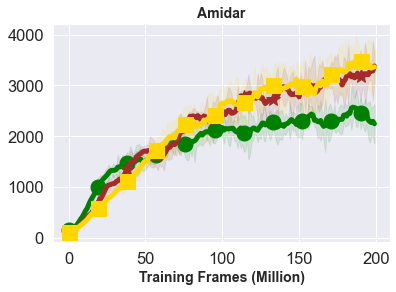

200
200
200


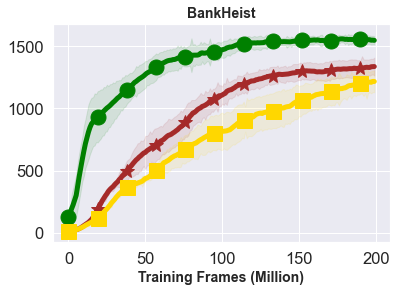

195
198
200


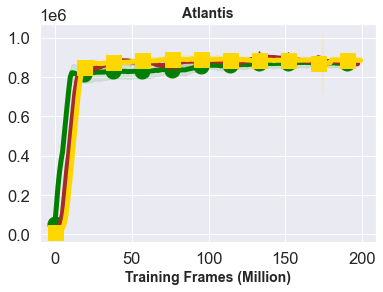

200
200
200


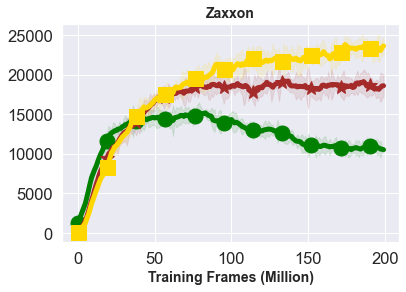

199
200
200


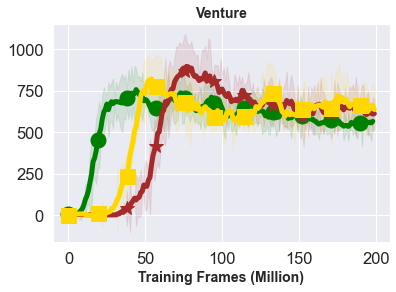

197
199
200


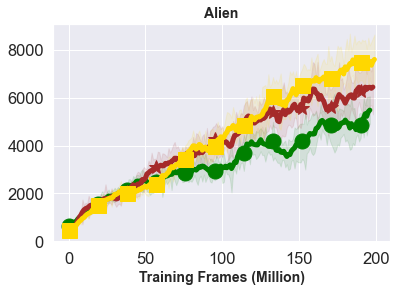

200
200
200


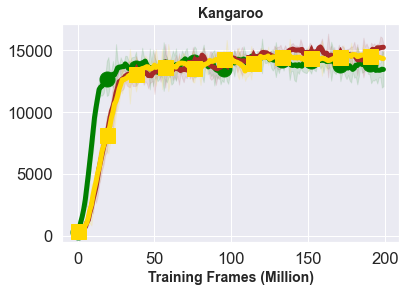

200
200
200


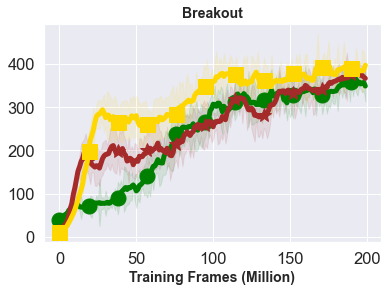

200
200
200


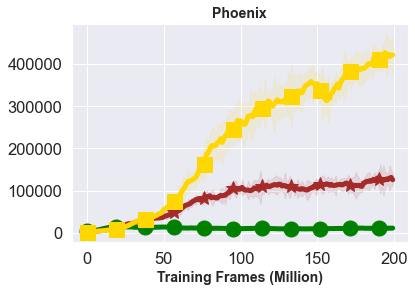

200
200
200


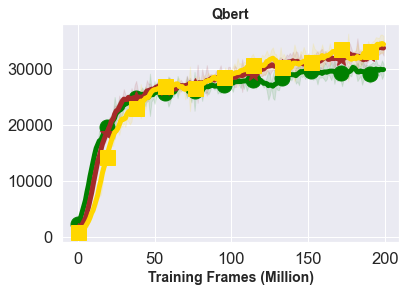

200
200
200


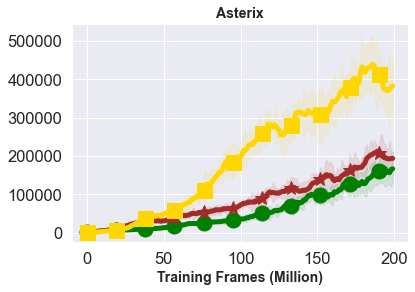

200
200
200


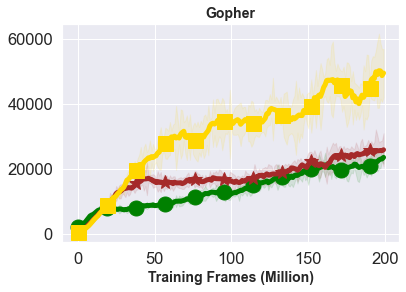

200
200
199


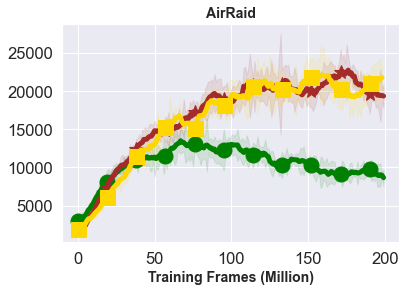

200
200
200


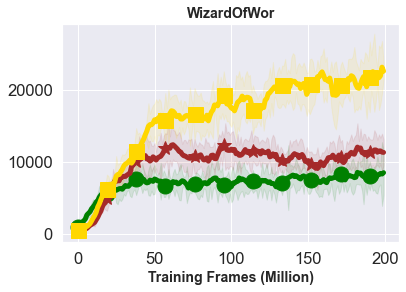

200
200
200


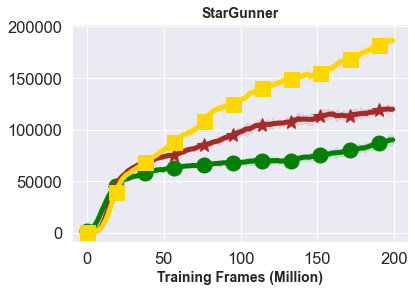

191
196
200


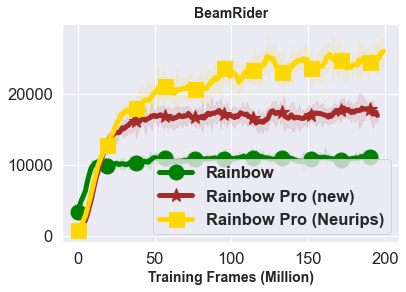

In [36]:
'''
key_order = ['Asterix', 'Qbert', 'Breakout', 'Seaquest', 'Amidar',
                 'Kangaroo', 'BeamRider', 'Gopher', 'Phoenix', 'Zaxxon']
'''
alg_li = ['rainbow-c0.0-d0.0-n3',
          'rainbow-c0.0-d0.005-n3',
          'rainbow-c0.05-d0.0-n3']
dic_labels  = {'rainbow-c0.0-d0.0-n3':'Rainbow', 
               'rainbow-c0.05-d0.0-n3':'Rainbow Pro (Neurips)', 
               'rainbow-c0.0-d0.005-n3':'Rainbow Pro (new)'}
dic_colors  = {'rainbow-c0.0-d0.0-n3':'green', 
               'rainbow-c0.05-d0.0-n3':'gold', 
               'rainbow-c0.0-d0.005-n3':'brown'}
dic_markers = {'rainbow-c0.0-d0.0-n3':'o', 
               'rainbow-c0.05-d0.0-n3':'s', 
               'rainbow-c0.0-d0.005-n3':'*'}
dic_mean = {}
for domain_index, domain in enumerate(dic_all.keys()):
    dic_mean[domain]={}
    fig, ax = plt.subplots()
    # ...
    fig.tight_layout()
    plt.subplots_adjust(left=0.15)
    #plt.subplots_adjust(left=-5)
    #figure(figsize=(6, 4), dpi=80)
    seaborn.set(style="darkgrid", font_scale=1.5)
    od = collections.OrderedDict(sorted(dic_all[domain].items()))
    for alg in od.keys():
        if alg in alg_li:
            orig_mean, std, N = my_mean(od[alg])
            dic_mean[domain][alg] = orig_mean
            mean = smooth(orig_mean)
            sqrtN = numpy.sqrt(N)
            plt.plot(mean, 
                     lw=5, 
                     label = dic_labels[alg],
                     color = dic_colors[alg],
                     marker= dic_markers[alg],
                     markevery = 19,
                     markersize = 15)
            print(len(mean))
            
            plt.fill_between(x=range(len(mean)),
                                 y1=mean+std/sqrtN, 
                                 y2=mean-std/sqrtN,
                                 color = dic_colors[alg],
                                 alpha=.1)
            
    legend_properties = {'weight':'bold'}
    if domain_index + 1 == len(dic_all):
        plt.legend(prop=legend_properties, fontsize=14,loc = 'lower right')
    plt.title(domain, fontsize=14,weight='bold')
    #plt.xticks([0,50,100,150,200])
    plt.xlabel("Training Frames (Million)", fontsize=14,weight='bold')
    plt.savefig("images/ICLR2022/full_learning_curves/{}.pdf".format(domain))
    
    plt.show()
    

In [30]:
human = dict()
# human['airraid'] = zzz
human['alien'] = 7127.7
human['amidar'] = 1719.5
human['assault'] = 742.0
human['asterix'] = 8503.3
human['atlantis'] = 29028.1
human['bankheist'] = 753.1
human['battlezone'] = 37187.5
human['beamrider'] = 16926.5
human['berzerk'] = 2630.4
human['boxing'] = 12.1
human['breakout'] = 30.5
# human['carnival'] = zzz
human['choppercommand'] = 7387.8
human['crazyclimber'] = 35829.4
human['demonattack'] = 1971.0
human['enduro'] = 860.5
human['fishingderby'] = -38.7
human['freeway'] = 29.6
human['frostbite'] = 4334.7
human['gopher'] = 2412.5
human['gravitar'] = 3351.4
human['hero'] = 30826.4
human['jamesbond'] = 302.8
# human['journeyescape'] = zzz
human['kangaroo'] = 3035.0
human['krull'] = 2665.5
human['kungfumaster'] = 22736.3
human['montezumarevenge'] = 4753.3
human['mspacman'] = 6951.6
human['namethisgame'] = 8049.0
human['phoenix'] = 7242.6
human['pitfall'] = 6463.7
human['pong'] = 14.6
# human['pooyan'] = zzz
human['qbert'] = 13455.0
human['riverraid'] = 17118.0
human['roadrunner'] = 7845.0
human['robotank'] = 11.9
human['seaquest'] = 42054.7
human['spaceinvaders'] = 1668.7
human['stargunner'] = 10250.0
human['timepilot'] = 5229.2
human['tutankham'] = 167.6
human['upndown'] = 11693.2
human['venture'] = 1187.5
human['videopinball'] = 17667.9
human['wizardofwor'] = 4756.5
human['yarsrevenge'] = 54576.9
human['zaxxon'] = 9173.3

dic_mean_normalized = {}
for domain in dic_mean.keys():
    #print(domain)
    if domain.lower() in human.keys():
        dic_mean_normalized[domain.lower()] = {}
        #print(human[domain.lower()])
        for alg in dic_mean[domain].keys():
            #print(alg,dic_mean[domain][alg][-1]/human[domain.lower()])
            dic_mean_normalized[domain.lower()][alg] = dic_mean[domain][alg]/human[domain.lower()]
    else:
        print("human score not found for game {}".format(domain))

algs = list(dic_mean_normalized[list(dic_mean_normalized.keys())[0]].keys())
algs = ['rainbow-c0.0-d0.005-n3' , 'rainbow-c0.05-d0.0-n3','rainbow-c0.0-d0.0-n3']
print(algs)
for a in algs:
    temp = [ ]
    for domain in dic_mean_normalized.keys():
        size = len(dic_mean_normalized[domain][a])
        if size != 200:
            full = numpy.concatenate([dic_mean_normalized[domain][a],(200-size)*[dic_mean_normalized[domain][a][-1]]])
            dic_mean_normalized[domain][a] = full
        temp.append(dic_mean_normalized[domain][a])
    temp = numpy.median(temp,axis=0)
    print(len(temp))
    plt.plot(smooth(temp,win=15),
             lw=3,
             label=dic_labels[a],
             color=dic_colors[a],
             marker= dic_markers[a],
             markevery = 19,
             markersize = 15)
plt.ylabel("normalized performance")
plt.xlabel("Training Frames (Million)")
plt.legend()
plt.subplots_adjust(bottom=0.2)
plt.savefig("images/ICLR2022/median_curve.pdf")


human score not found for game AirRaid
['rainbow-c0.0-d0.005-n3', 'rainbow-c0.05-d0.0-n3', 'rainbow-c0.0-d0.0-n3']


IndexError: index -1 is out of bounds for axis 0 with size 0

<BarContainer object of 18 artists>

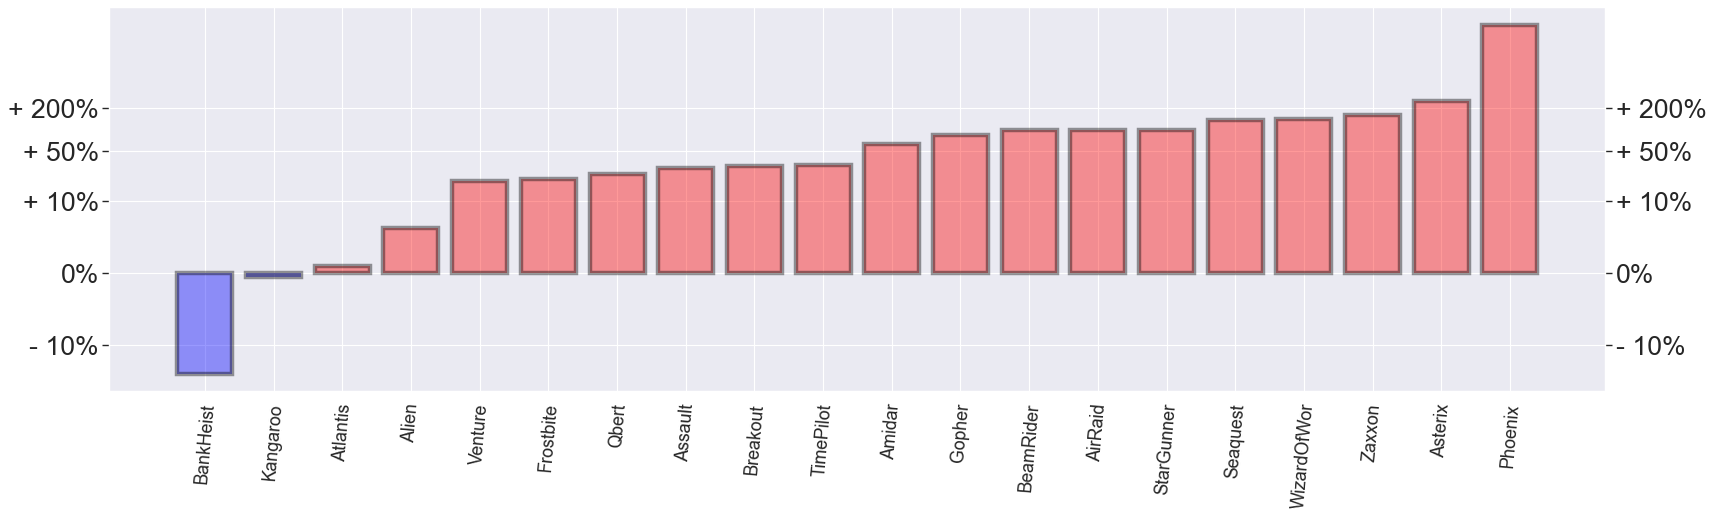

In [31]:
random = dict()
# human['airraid'] = zzz
random['alien'] = 227.8
random['amidar'] = 5.8
random['assault'] = 222.4
random['asterix'] = 210
random['asteroids'] = 719
random['atlantis'] = 12850
random['bankheist'] = 14.1
random['battlezone'] = 2360
random['beamrider'] = 363.9
random['berzerk'] = 123.7
random['bowling'] = 23.1
random['boxing'] = 0.1
random['breakout'] = 1.7
# human['carnival'] = zzz
random['choppercommand'] = 811
random['crazyclimber'] = 10780
random['demonattack'] = 152.1
random['enduro'] = 0
random['fishingderby'] = -91.7
random['freeway'] = 0
random['frostbite'] = 65.2
random['gopher'] = 257.6
random['gravitar'] = 173
random['hero'] = 1027
random['icehockey'] = -11.2
random['jamesbond'] = 29
# human['journeyescape'] = zzz
random['kangaroo'] = 52
random['krull'] = 1598
random['kungfumaster'] = 258
random['montezumarevenge'] = 0
random['mspacman'] = 307.3
random['namethisgame'] = 2292.3
random['phoenix'] = 761.4
random['pitfall'] = -229
random['pong'] = -20.7
# human['pooyan'] = zzz
random['privateeye'] = 24.9
random['qbert'] = 163.9
random['riverraid'] = 1338
random['roadrunner'] = 11.5
random['robotank'] = 2.2
random['seaquest'] = 68.4
random['solaris'] = 1236
random['spaceinvaders'] = 148
random['stargunner'] = 664
random['timepilot'] = 3568
random['tutankham'] = 11.4
random['upndown'] = 533.4
random['venture'] = 0
random['videopinball'] = 16256.9
random['wizardofwor'] = 563.5
random['yarsrevenge'] = 3092.9
random['zaxxon'] = 32.5

alg_1 = 'rainbow-c0.0-d0.005-n3'
alg_1 = 'rainbow-c0.05-d0.0-n3'
alg_2 = 'rainbow-c0.0-d0.0-n3'
y_axis = {}
for game in list(dic_mean.keys()):
    r1,r2 = dic_mean[game][alg_1][-1], dic_mean[game][alg_2][-1]
    try:

        human_score = human[game.lower()]
        random_score = random[game.lower()]
    except:
        human_score = -1e6
        random_score = 0
    if r1>=r2:
        y_axis[game] = 100*(r1-r2)/(numpy.max([r2,human_score])-random_score+1e-6)
    else:
        y_axis[game] = 100*(r1-r2)/(numpy.max([r1,human_score])-random_score+1e-6)

for game in list(y_axis.keys()):
    sign   = numpy.sign(y_axis[game])
    y = y_axis[game]*sign
    y = numpy.log10(y+0.0000001)
    y = y*sign
    y_axis[game] = y

zipped_lists = zip(y_axis.values(), y_axis.keys())
sorted_pairs = sorted(zipped_lists)



tuples = zip(*sorted_pairs)
y_axis, game_labels = [ list(tuple) for tuple in  tuples]


for index,y in enumerate(y_axis):
    if y>0:
        break
y_axis_neg = y_axis[0:index]
game_labels_neg = game_labels[0:index]
y_axis_pos = y_axis[index:]
game_labels_pos = game_labels[index:]


fig = plt.figure(figsize=(22, 8), dpi=80)
fig.subplots_adjust(bottom=0.35)
fig.subplots_adjust(top=0.95)
fig.subplots_adjust(left=0.075)
fig.subplots_adjust(right=0.925)

plt.xticks(rotation=85, fontsize = 16)


plt.yticks([-numpy.log10(50), -numpy.log10(10), 0, numpy.log10(10), numpy.log10(50), 
            numpy.log10(200)], ['- 50%', '- 10%', '0%', '+ 10%', '+ 50%', '+ 200%'], 
            fontsize = 24)
plt.tick_params(axis='y', 
                which='both', 
                left=True, 
                right=True, 
                labelleft=True, 
                labelright=True)

plt.bar(game_labels_neg,y_axis_neg, 
        lw = 4, 
        color = 'blue', 
        alpha=0.4, 
        edgecolor='black')
plt.bar(game_labels_pos,
        y_axis_pos, 
        lw = 4, 
        color = 'red', 
        alpha=0.4, 
        edgecolor='black')